# Computer Simulation
The aim of computer simulation is to answer quantitatively some questions regarding 'Wisdom of Crowds'. Each section of this document will focus on answering these questions and creating visualization which aid in understanding. Key insights in each segment are mentioned in Markdown cells.

## SetUp

In [1]:
# Modules
import os 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import LinearRegression
# Mpl style
mpl.style.use("ggplot")
path = "./SimulationPictures2/Set2"
# Save function 
def savefig(name, extension = ".jpg"):
    image_name = name+extension
    image_path = os.path.join(path, image_name)
    plt.savefig(image_path)
    
# Random 
from random import choice

# Patches
import matplotlib.patches as mpatches

In [2]:
# Functions
# Create random numbers which add up to a certain number
def threshold_sizes(number, max_limit):
    sizes = []
    net_sum = 0
    available_spaces = number
    while net_sum!=number:
        av= min(available_spaces, max_limit)
        c = choice(np.arange(1, av+1))
        net_sum += c
        available_spaces -= c
        sizes.append(c)
    return sizes

# into a function 
def max_min(ranges, population, probability):
    # Outputs
    starts = []
    ends = []
    # Program
    mask = np.ones((population, ), dtype = "bool")
    pop = np.arange(population)
    for index, size in enumerate(ranges):
        max_ = population-size
        #Temp Mask
        temp_mask = np.ones((population, ), dtype = "bool")
        temp_mask[max_:] = False
        # Combined Mask
        combined_mask = (temp_mask)&(mask)
        c = choice(pop[combined_mask])
        it = 0
        while mask[c:c+size+1].all() == False and it<10:
            c = choice(pop[combined_mask])
            it+= 1
        if it ==10:
            starts, ends = up_down(probability)
        else:
            c_end = c+size
            mask[c:c_end+1] = False
            starts.append(c)
            ends.append(c_end)
    
    return (starts, ends)

def up_down(probability):
    rand_ = np.random.rand(1)
    res  =rand_ <=0.5
    if res == True:
        start, end = [0], [probability]
    else:
        start, end = [100-probability], [100]
    return start, end

In [3]:
# Function mask builder
def mask_maker(population, starts, ends):
    all_numbers = np.arange(population)
    mask_original = np.zeros((population), dtype = "bool")
    for lower, upper in zip(starts, ends):
        mask1 = np.zeros(population, dtype = "bool")
        mask1[lower:upper] = True
        mask_original = (mask_original)|(mask1)
    return mask_original

In [4]:
def people_simulation(population, expertprof = 70, ordinaryprof = 50 ,expertprob = 5):
    group = np.zeros(population)
    noexperts = round((expertprob/100)*population)
    group[-noexperts:] = 1
    
    # Probabilities
    group_probs = np.where(group==0,ordinaryprof, expertprof)
    
    masksarray = []
    for probability in group_probs:
        sizes = threshold_sizes(probability, 10)
        starts, ends = max_min(sizes,100,probability)
        m = mask_maker(100, starts, ends)
        masksarray.append(m)
    
    return np.array(masksarray)

def predict(masks_array, runs = 100):
    boxes = np.random.randint(0, 100, runs)
    allps = []
    for predictor in masks_array:
        maskpreds = predictor[boxes].astype(np.int8)
        allps.append(maskpreds)
    allps = np.array(allps)
    accuracy = (allps.mean(axis =0)>=0.50).mean()
    return accuracy

In [5]:
# Examining the group
# Waffle chart for this group
def waffle_creation(categories, values, height = 10, width = 40, signs = "", cmap_name = "coolwarm"):
    
    # Propotions of each category
    total = values.sum(axis = 0)
    proportions = (values/total)
    
    # Categories array
    categories_array = np.arange(1, len(np.unique(categories))+1)
    
    # Number of tiles
    tiles = height*width
    tiles_per_cat = round(proportions*tiles)
    
    # Sum 
    SUM = tiles_per_cat.sum()
    if SUM>tiles:
        diff = SUM-tiles
        for i in range(int(diff)):
            copy = np.sort(tiles_per_cat.copy())
            copy[i] -= 1
        tiles_per_cat = copy.copy()[::-1]
    
    #  Matrix 
    matrix = np.zeros(tiles)
    
    
    # Cummulative sums 
    cummulative = np.cumsum(tiles_per_cat).astype(np.int32)
    initial = 0
    for index, cum_index in enumerate(cummulative):
        matrix[initial:cum_index] = categories_array[index]
        initial = cum_index
    
    matrix = matrix.reshape(width, height).T
    
    # Labels
    import matplotlib.patches as mpatches    
    colormap = mpl.cm.get_cmap(cmap_name)
    color_values = np.append(cummulative, 0)[-1::-1]
    
    labels_handles = []
    for i in range(len(categories)):
        col_val = colormap(color_values[i]/tiles)
        label_ = categories[i]+" ("+str(int(tiles_per_cat[i]))+ signs + ")"
        labels_handles.append(mpatches.Patch(color = col_val, label = label_))
    
    # Plotting the figure
    # Showing the matrix 
    plt.figure()
    plt.matshow(matrix, cmap = colormap)
    
    # Ticks
    ax = plt.gcf().gca()
    ax.set_yticks(np.arange(-0.5, 10, 1), minor = True)
    ax.set_xticks(np.arange(-0.5, 40, 1), minor = True)
    #ax.grid(False)
    ax.grid(which = "minor", color = "white", linestyle = "-", linewidth = 1)
    
    # Legends
    plt.legend(handles = labels_handles, loc = "lower center", 
              bbox_to_anchor = (0, -0.3, 0.95, 1))
    

    

In [6]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)

    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    #for i, tiles in enumerate(tiles_per_category):
        #print (df_dsn.index.values[i] + ': ' + str(tiles))

    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       

            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index

    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.get_cmap(colormap)
    plt.matshow(waffle_chart, cmap=colormap)
    #plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]
    
    new_values = np.append(values_cumsum[-1::-1], [0], 0)
    new_values = new_values[-1::-1]
    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'

        color_val = colormap(int(new_values[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [7]:
def set_grid():
    ax = plt.gcf().gca()
    ax.set_yticks(np.arange(-0.5, 10, 1), minor = True)
    ax.set_xticks(np.arange(-0.5, 40, 1), minor = True)
    ax.grid(False)
    #ax.grid(which = "minor", color = "white", linestyle = "-", linewidth = 1)

In [8]:
# Condfidence Grids
def confidence_grids(array, title = "Title", cmap = "viridis"):
    """Input the group mask array"""
    req = array.sum(axis = 0)
    # Seaborn for Group Specializations
    plt.figure(figsize=(10, 8))
    seaborn.heatmap(req.reshape(10, 10), cmap = cmap)
    for i in range(10):
        plt.axhline(i, color="white", linewidth= 5)
        plt.axvline(i, color = "white", linewidth = 5)
    plt.title(title, fontsize= 18)
    plt.xticks([])
    plt.yticks([])

def confidences(array):
    """Enter the mask array"""
    return array.sum(axis = 0)

In [9]:
def savebars(title):
    ax = plt.gcf().gca()
    ax.set_position([0.25,0.15, 0.7, 0.7])
    plt.savefig(path+"/"+title)

def savewaffle(title):
    ax = plt.gcf().gca()
    ax.set_position([0.2,0.1, 0.5,0.8])
    plt.savefig(path+"/"+title)

## How does the Simulation Work?

## How to optimize Group performance?
The main aim of the project is to understand the componenets involved in making an indeal group. All the factors affecting these are studied in this project. The aim is to present some key findings of the research through COmputer simulations so as to form better groups.

### How does the group size affect performance of that group?
This question basically asks the relationship between group size and the performance of the group. Infact a subsidary question can be answered in relation to this question, "Is there an ideal group size?"

## Different Group structures
Different demographic conditions of groups can affect the performance of a group. The ratio of ordinary people to experts can affect the performance. Also, having a wide variety of proficiency in the group can also be expored in this section. 
Different group structures may be compared to establish one architecture which fits the real life models perfectly (Other parameters in selection process can be established)

### Ordinary Group predominantly 
This group consists of predominantly general population with a small percentage of the entire population being experts. The percentage of expert population could be experimented upon.

In [10]:
# Architecture & Controls
groupsize = 100
expertpercentage = 5

In [11]:
# Sample Group
ordinary = people_simulation(groupsize, expertprof = 70, ordinaryprof = 55, expertprob = expertpercentage)
proficiencies = np.where(ordinary.sum(axis = 1)>=70, 1, 0)
elements, counts = np.unique(proficiencies,return_counts = True)

In [12]:
# Confidence intervals
ordinary.sum(axis = 0)

array([28, 37, 43, 53, 62, 68, 64, 69, 65, 59, 59, 61, 56, 54, 57, 56, 55,
       58, 57, 61, 54, 61, 54, 50, 51, 56, 49, 44, 45, 56, 58, 64, 64, 68,
       57, 52, 54, 54, 52, 56, 54, 57, 57, 59, 54, 59, 63, 68, 70, 75, 71,
       71, 71, 68, 61, 50, 52, 51, 48, 53, 52, 58, 54, 55, 58, 63, 68, 61,
       63, 58, 52, 52, 53, 59, 68, 60, 59, 60, 62, 59, 54, 54, 57, 48, 47,
       59, 58, 60, 61, 60, 63, 61, 52, 55, 57, 57, 49, 38, 29, 11])

In [13]:
# DataFrame to save all the confidence intervals
dfconfidence = pd.DataFrame(columns = ["Experts","Ordinary", "Diverse1", "Diverse2" ])
dfconfidence["Ordinary"] = ordinary.sum(axis = 0)

Total number of tiles is 100


<Figure size 432x288 with 0 Axes>

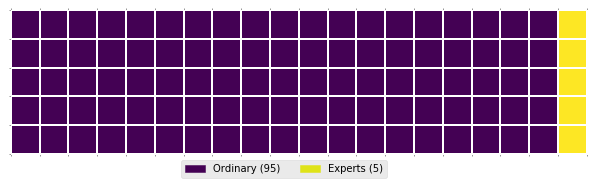

In [14]:
# Waffle Chart of the Sample Group 
create_waffle_chart(["Ordinary", "Experts"], pd.Series(counts), colormap = "viridis", 
                   height = 5, width = 20)
#set_grid()
#plt.title("Group Demographics", y = 1.15, fontsize = 18)
savewaffle("OrdinaryGroupDemographics.jpg")

In [15]:
# Looking at the performance of the group
avg = []
for runs in range(10):
    ordinary = people_simulation(groupsize, expertprof = 70, ordinaryprof = 55, expertprob = expertpercentage)
    ordinary_accuracy = predict(ordinary, 10000)
    avg.append(ordinary_accuracy)
avg = np.array(avg)
print("Group Performance: ", avg.mean())
print("Average Performance: ", round(ordinary.sum(axis = 1).mean()/100, 2))

Group Performance:  0.86678
Average Performance:  0.56


In [16]:
# Individual performances
individual_accuracies = []
for predictor in ordinary:
    boxnumbers = np.random.randint(0, 100, 100)
    individual_accuracy = predictor[boxnumbers].mean()
    individual_accuracies.append(individual_accuracy)
individual_accuracies = np.array(individual_accuracies)

In [17]:
round(individual_accuracies.mean(), 2)

0.56

In [18]:
dfGroupIndividual = pd.DataFrame(columns = ["GroupPerformance", "IndividualPerformance", "Architecture"])
dfGroupIndividual["Architecture"] = ["Ordinary", "Diverse1", "Diverse2", "Experts"]
dfGroupIndividual = dfGroupIndividual.set_index("Architecture")

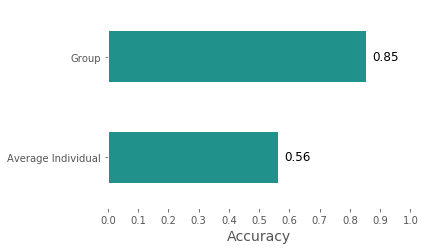

In [19]:
# Bar plot representing group performance and average 
group_and_individual = pd.Series(np.array([ordinary_accuracy,individual_accuracies.mean()], dtype = float),["Group", "Average Individual"])
dfGroupIndividual.loc["Ordinary"] = np.array([ordinary_accuracy,individual_accuracies.mean()], dtype = float)
ax = group_and_individual.plot(kind = "barh", color = mpl.cm.get_cmap("viridis")(2/4), 
                              figsize = (6, 4))

plt.xticks(np.linspace(0, 1, 11))

# Labelling
plt.title("", fontsize = 16)
plt.xlabel("Accuracy", fontsize = 14)
ax.invert_yaxis()
# Annotate 
for i in ax.patches:
    text = str(round(i.get_width(), 2))
    plt.annotate(text,xy = [i.get_width(), i.get_y()+0.28], 
                xytext = [i.get_width()+0.02, i.get_y()+0.28], size = 12)
ax = plt.gcf().gca()

ax.set_facecolor("white")
savebars("OrdinaryGroup_Individual_Group.jpg")

* 1)The group accuracy is about 0.85 and the average individual accuracy is 0.56. The performance of the group is 60% higher than that of individuals. 
* 2) It is also interesting to observe that the performance of the group is even higher than the expert present in the group. 

Each iteration of the code create a completely new group with different specializations. So, one group so produced from the code cannot represent all the other groups with the same group size. A particular number of runs should be done for each expert size as it would reflect generl relation better. 

In [20]:
# Experimentation with different percentages
# But predominantly low proficiency
# Range from 5 to 15
groupsize = 100
accuracies = []
for expertper in range(5, 81):
    groups = []
    for run in range(10):
        run_group = people_simulation(groupsize, expertprof = 70, ordinaryprof = 55, expertprob = expertper)
        groups.append(run_group)
    accuracy = []
    for pred in groups:
        accuracy.append(predict(pred, 1000))
    accuracy = np.array(accuracy)
    accuracies.append(accuracy.mean())

In [21]:
# Looking at the accuracies
accuracies = np.array(accuracies)
accuracies

array([0.849 , 0.8858, 0.8651, 0.8741, 0.8811, 0.8805, 0.8856, 0.8984,
       0.8926, 0.902 , 0.8943, 0.8694, 0.9113, 0.8913, 0.8698, 0.8764,
       0.8881, 0.8753, 0.8648, 0.8991, 0.8967, 0.8994, 0.892 , 0.861 ,
       0.8973, 0.9022, 0.8976, 0.875 , 0.9014, 0.92  , 0.8912, 0.8893,
       0.9131, 0.9031, 0.9008, 0.8794, 0.9048, 0.8936, 0.9111, 0.863 ,
       0.9092, 0.8946, 0.8861, 0.8821, 0.9007, 0.8609, 0.8994, 0.8547,
       0.8886, 0.8885, 0.9067, 0.8962, 0.8773, 0.9077, 0.9178, 0.8983,
       0.9064, 0.895 , 0.9101, 0.9003, 0.8974, 0.9151, 0.9172, 0.9262,
       0.8665, 0.9254, 0.9061, 0.9453, 0.9212, 0.9007, 0.9128, 0.8982,
       0.8947, 0.8791, 0.9036, 0.9389])

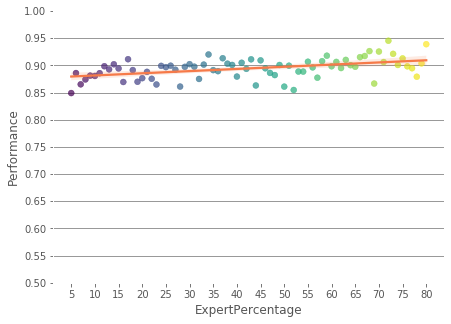

In [22]:
# Expert Percentage vs. Accuracy
expert_precentages = np.arange(5, 81)
dfper_acc = pd.DataFrame(columns = ["ExpertPercentage", "Accuracy"])
dfper_acc["ExpertPercentage"] = expert_precentages
dfper_acc["Accuracy"] = accuracies

dfper_acc.plot(kind = "scatter", x = "ExpertPercentage", y = "Accuracy", c = expert_precentages,
            cmap = "viridis", alpha = 0.7, figsize = (7, 5), s = 35, colorbar = False)
seaborn.regplot(x = "ExpertPercentage", y = "Accuracy", data =dfper_acc, 
               scatter = False, color = mpl.cm.get_cmap("RdYlBu")(2/9))
plt.xticks(np.arange(5, 81, 5), np.arange(5, 81, 5))
plt.yticks(np.linspace(0.5, 1, 11))
ax = plt.gcf().gca()
ax.set_ylabel("Performance")
ax = plt.gcf().gca()
ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")
plt.title("", fontsize = 18, y = 1.05)
savefig("ExpertPercentage.jpg")
plt.show()

**The Next Slides are to be changed**

In [23]:
# The slope of the graph 
# Its meaning 
slope = (0.91-0.875)/(55-5)
print("The slope of the line is",round(slope,3))

# Percentage increase in performance per percentage increase in experts
print(round(slope*100, 3))

The slope of the line is 0.001
0.07


In [24]:
# Percentage Changes (Relatively)
performance_change = ((0.91-0.875)/0.875)*100
expert_ratio_change = ((55-10)/10)*100
print("PerformanceChange:", round(performance_change, 2))
print("ExpertChange:",expert_ratio_change )

PerformanceChange: 4.0
ExpertChange: 450.0


***Remember the graph starts from 0.500***
* 1) As the expert percentage increases, the performace of the entire group increases. This relationship is almost linear in nature. The slope of the graph is not too high. This means that for an increase in expert percentage, there is small increase in the accuracy. 
* 2) Incidentally the graph also represents the Accuracy vs Experts graph. This is becuase the group size is 100.
* 3) The percentage increase for an increase in expert ratio is 0.217%
* 4) For a 700% change in Expert Ratio in the group, there has been only a 20% change in Performance. Really, the number of experts matters very less for a group.

In [25]:
# How does the performance of the group change with respect to change in expert proficiency?
groupsize = 100
expertprob = 10
accuracies = []
for experproficiency in range(65, 90):
    accuracy  = []
    groups = []
    for run in range(10):
        group = people_simulation(groupsize, expertprof = experproficiency, ordinaryprof = 55, expertprob = expertprob)
        groups.append(group)
    for predictor in groups:
        acc = predict(predictor, runs = 1000)
        accuracy.append(acc)
    
    accuracies.append(np.array(accuracy).mean())
accuracies = np.array(accuracies)

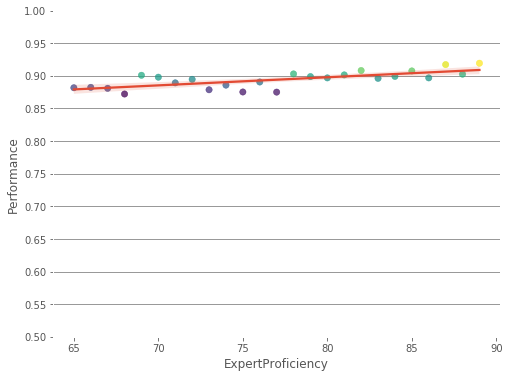

In [26]:
# Plot of the Data
dfExpProf = pd.DataFrame(columns = ["ExpertProficiency", "Accuracy"])
dfExpProf["ExpertProficiency"], dfExpProf["Accuracy"] = np.arange(65, 90), accuracies
dfExpProf.plot(kind = "scatter", x = "ExpertProficiency", y = "Accuracy", c = accuracies, alpha = 0.75, 
              cmap = "viridis", colorbar = False, s = 40, figsize = (8, 6))
seaborn.regplot(x = "ExpertProficiency", y = "Accuracy", data = dfExpProf, scatter = False, 
               )
plt.title("", fontsize = 16, y = 1.05)
plt.yticks(np.linspace(0.5, 1, 11))
plt.ylabel("Performance")
ax = plt.gcf().gca()
ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")
savefig("ExpertProficiency.jpg")
plt.show()

**Next slide is to be changed**

In [27]:
# Relative Changes
performance_change = ((0.85-0.70)/0.75)*100
expertprof_change = ((90-65)/65)*100
print("Percentage Change performance:", round(performance_change, 2))
print("Percentage Change expert proficiency", round(expertprof_change, 2))

Percentage Change performance: 20.0
Percentage Change expert proficiency 38.46


* 1) It can be seen that as Expert Proficiency of a group increases, the Group Performance increases. The basic concept is that there more information present. As there is more information, the group performs better. 
* 2) The slope of the graph is around 0.005. This represents a very small increase in performance per incresae in ExpertProficiency. 
* 3) For a 38.46% Change in Expert Proficiency, there has been a 20% increase in performance.

In [28]:
# Performance at different group sizes
# Constant expert prob of 10%
# Proficiencies of 50 and 70 for ordinary and experts respectively
accuracies = []
for groupsize in range(5, 200, 1):
    accuracy = []
    groups = []
    for run in range(10):
        group = people_simulation(groupsize, expertprof = 70, ordinaryprof = 55, expertprob = 5)
        groups.append(group)
    for predictor in groups:
        acc = predict(predictor, runs = 1000)
        accuracy.append(acc)
    acc = np.array(accuracy).mean()
    accuracies.append(acc)
    
accuracies = np.array(accuracies)

In [29]:
# Linear Model 
def LinearFit(x, y):
    lm = LinearRegression()
    lm.fit(x.reshape(-1, 1), y)
    return(lm.coef_[0], lm.intercept_)

In [30]:
# Creating a DataFrame
dfPerformance = pd.DataFrame(columns = ["Slope", "Intercept", "Model"])
dfPerformance["Model"] = ["OrdinaryGroup", "DiverseGroup", "ExpertGroup"]
dfPerformance = dfPerformance.set_index("Model")

In [31]:
dfPerformance.loc["OrdinaryGroup"] = LinearFit(np.arange(5, 200), accuracies)

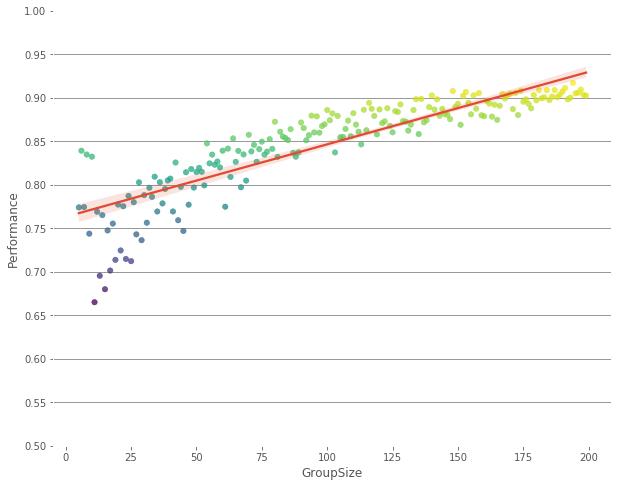

In [32]:
# Scatterplot
dfGroupSizes = pd.DataFrame(columns = ["GroupSize", "Performance"])
dfGroupSizes["GroupSize"],dfGroupSizes["Performance"]  = np.arange(5, 200), accuracies

# Plot
ax = dfGroupSizes.plot(kind = "scatter", x ="GroupSize", y = "Performance", c = accuracies, cmap = "viridis", 
                 colorbar = False, figsize = (10,8), s = 30, alpha = 0.75)
#plt.title("Performance of a Group with Different Sizes", fontsize = 16)
seaborn.regplot(x = "GroupSize", y = "Performance", data = dfGroupSizes, scatter = False)
#ax.yaxis.grid(color = "gray",)

ax.set_facecolor("white")
ax.yaxis.grid(color = "gray",)
plt.yticks(np.linspace(0.5, 1, 11))
savefig("OrdinaryGroup_Different_sizes.jpg")

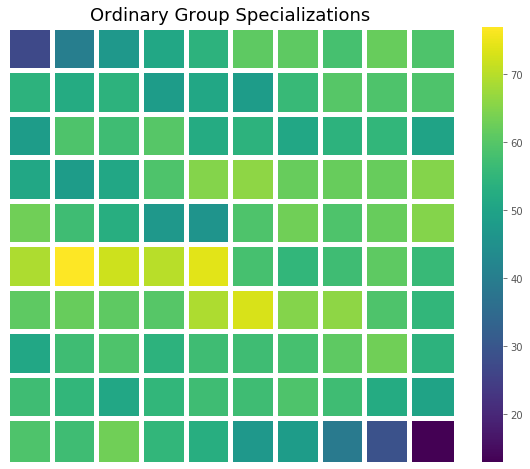

In [33]:
confidence_grids(ordinary, title = "Ordinary Group Specializations", cmap = "viridis")
savefig("OrdinaryGroup_Group_Specializations.jpg")

* 1) One key understanding is that the group is very diverse. Looking at the group this is very evident. 

**There are a few limitations for this architecctre**
* 1) It assumes that all the experts have the same proficiency level and all the ordinary people have a set proficiency. 
* 2) In general, a group contains a wide variety of proficiency levels. 


**Findings**
* 1) The group is bigger than the sum of its individual members. There is a certain synergy in the group. (Bar Graph)
* 2) The number of experts in a group matters very less for the group. (Scater Plot - Accuracy vs. ExpertPercentage)
* 3) The proficiency of experts also matters very less for the group. (Scatter Plot - Accuracy vs. ExpertPercentage)

### Completely Diverse Group (General Group)
This group consists of experts and a wide range of ordinary citizens. For example, the range of the proficiency for general proficiency level can be from 50 to 62-65. The expert probability for this case can be set at around 75 - 80. Justification for these proficiencies can be offered in the paper.

**NO Experts**
This is a no experts group with same average group proficiency as the other groups examined. This has diversity in proficiencies and also in the specialization. 

In [34]:
# Building a system which produces a group with same mean proficiency but different 
proficiencies = np.random.normal(57.5,3.5, (100,)).astype(np.int32)

In [35]:
proficiencies

array([53, 58, 65, 54, 58, 56, 57, 54, 61, 60, 56, 57, 60, 60, 58, 57, 60,
       54, 58, 55, 55, 59, 62, 49, 57, 64, 58, 55, 60, 57, 59, 52, 56, 56,
       57, 62, 58, 55, 52, 57, 54, 61, 51, 61, 59, 59, 63, 54, 58, 55, 61,
       57, 55, 52, 60, 62, 60, 59, 59, 53, 57, 60, 60, 60, 58, 52, 56, 52,
       55, 58, 57, 60, 52, 52, 56, 50, 56, 55, 57, 55, 55, 58, 54, 64, 63,
       59, 52, 53, 60, 56, 57, 57, 52, 56, 53, 55, 62, 60, 61, 59])

In [36]:
# masks
low = proficiencies<54
medium = (proficiencies>=54) & (proficiencies<=62)
high = proficiencies>62

# Groups 
copy_prof = proficiencies.copy()
copy_prof[low] = 0
copy_prof[medium] = 1
copy_prof[high] = 2
groups = copy_prof.copy()

In [37]:
# Counts
elements, counts = np.unique(groups, return_counts = True)

Total number of tiles is 100


<Figure size 432x288 with 0 Axes>

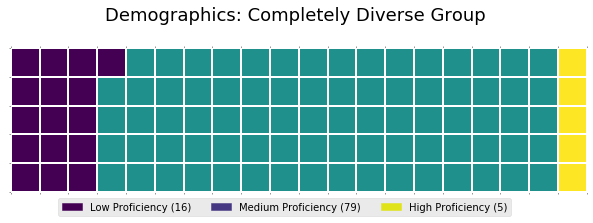

In [38]:
# Waffle Chart for displaying demographics
create_waffle_chart(["Low Proficiency", "Medium Proficiency","High Proficiency"], pd.Series(counts), colormap = "viridis", 
                   height = 5, width = 20)
#set_grid()
plt.title("Demographics: Completely Diverse Group ", y = 1.15, fontsize = 18)
plt.xticks([])
plt.yticks([])
savewaffle("DiverseGroup1Demographics.jpg")

In [39]:
create_waffle_chart

<function __main__.create_waffle_chart(categories, values, height, width, colormap, value_sign='')>

In [40]:
group = []
for proficiency in proficiencies:
    sizes = threshold_sizes(proficiency, 10)
    starts, ends = max_min(sizes,100,proficiency)
    one = mask_maker(100, starts, ends)
    group.append(one)

In [41]:
# Performance of the group 

diverse_acc = predict(group, 1000)
print("Group Performance: ", round(diverse_acc, 2))
print("Average Individual Performance",round(proficiencies.mean(),2)/100)

Group Performance:  0.81
Average Individual Performance 0.5708


In [42]:
# Saving the data 
dfconfidence["Diverse1"] = confidences(np.array(group))

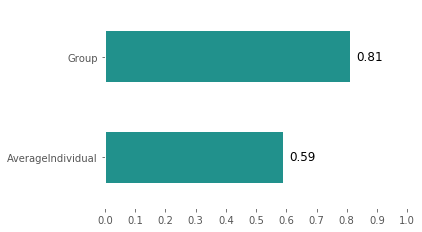

In [43]:
# Bar
group_individual = pd.Series([round(diverse_acc, 2),round(proficiency.mean(),2)/100],["Group", "AverageIndividual"], dtype = float)
dfGroupIndividual.loc["Diverse1"] = np.array([round(diverse_acc, 2),round(proficiency.mean(),2)/100], dtype = float)
group_individual.plot(kind = "barh", color = mpl.cm.get_cmap("viridis")(2/4), figsize = (6, 4))
ax = plt.gcf().gca()
ax.invert_yaxis()

for i in ax.patches:
    text = str(round(i.get_width(), 2))
    plt.annotate(text,xy = [i.get_width(), i.get_y()+0.28], 
                xytext = [i.get_width()+0.02, i.get_y()+0.28], size = 12)
# Labelling
plt.title("", fontsize = 16)
plt.xticks(np.linspace(0, 1, 11))
#ax.xaxis.grid(color = "gray",)
ax.set_facecolor("white")
savebars("DiverseGroup1_Group_Individual.jpg")
plt.show()




In [44]:
# Function - Create Diverse and accuracy proficiencies 
def diverse_group(mean, deviation, groupsize):
    profs = np.random.normal(mean,deviation, (groupsize,)).astype(np.int32)
    maskarray = []
    for prof in proficiencies:
        sizes = threshold_sizes(prof, 10)
        starts, ends = max_min(sizes,100,prof)
        one = mask_maker(100, starts, ends)
        maskarray.append(one)
    return np.array(maskarray)

In [45]:
# Scatter Plot function 
def plot_sizes(sizes, performance,title="Title", **kwargs):
    dfGroup = pd.DataFrame(columns = ["GroupSize", "Performance"])
    dfGroup["GroupSize"],dfGroup["Performance"]  = sizes, performance

    # Plot
    dfGroup.plot(kind = "scatter", x ="GroupSize", y = "Performance", c = performance, cmap = "viridis", 
                 colorbar = False, figsize = (10,8), s = 30, alpha = 0.75, **kwargs)
    plt.title(title, fontsize = 16)
    seaborn.regplot(x = "GroupSize", y = "Performance", data = dfGroup, scatter = False)

In [46]:
# How do different Group Sizes affect the performance of the group?
# Mean - 51.25, deviation - 3.25
mean = 57
deviation = 3.5
accuracies = []
for groupsize in range(5, 200, 1):
    accuracy = []
    groups = []
    for run in range(20):
        group = diverse_group(mean, deviation, groupsize)
        groups.append(group)
    for predictor in groups:
        acc = predict(predictor, 1000)
        accuracy.append(acc)
    accuracies.append(np.array(accuracy).mean())
accuracies = np.array(accuracies)

In [47]:
# Adding to the DataFrame
dfPerformance.loc["DiverseGroup"] = LinearFit(np.arange(5, 200, 1), accuracies)

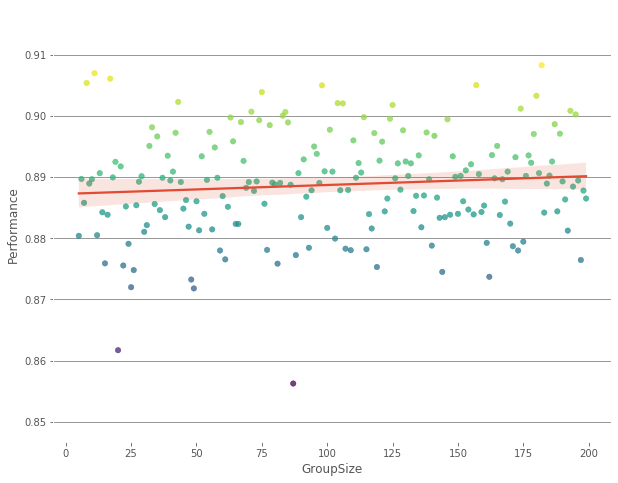

In [48]:
plot_sizes(np.arange(5, 200,1), accuracies, title = "")
ax = plt.gcf().gca()
ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")
savefig("DiverseGroup_Performance_Groupsize.jpg")

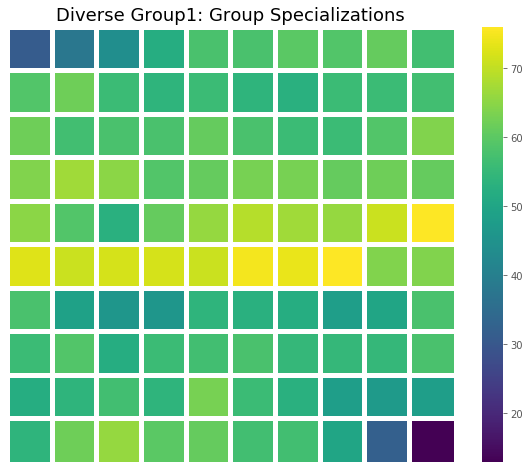

In [49]:
# Group Specializations of Diverse 1
confidence_grids(np.array(group), title = "Diverse Group1: Group Specializations")
savefig("DiverseGroup1_Group_Specializations.jpg")

**NO Experts produced vague results**

Another way to create a diverse group is to dedicte ranges for the Experts and also Low Proficiency People

In [50]:
# Importing choices
from random import choices
choices(np.arange(63, 68), k = 7)

[66, 63, 63, 67, 67, 63, 65]

In [51]:
def diversegroup(population, expertmin=63,expertmax=67, ordinarymin=48,ordinarymax=52,expertprob = 5):
    group = np.zeros(population)
    noexperts = round((expertprob/100)*population)
    group[-noexperts:] = 1
    
    # Probabilities
    ordinary_array = np.arange(ordinarymin, ordinarymax)
    expert_array = np.arange(expertmin, expertmax)
    # Length 
    len_ordinary = population - noexperts
    group_probs = group.copy()
    # Masks
    ordinary_mask = (group==0)
    expert_mask = (group==1)
    # Input array
    ordinary_input = choices(ordinary_array, k = len_ordinary)
    expert_input =  choices(expert_array, k = noexperts)
    group_probs[ordinary_mask] = ordinary_input
    group_probs[expert_mask] =expert_input
    group_probs = group_probs.astype(np.int32)
    
    
    masksarray = []
    for probability in group_probs:
        sizes = threshold_sizes(probability, 10)
        starts, ends = max_min(sizes,100,probability)
        m = mask_maker(100, starts, ends)
        masksarray.append(m)
    
    return np.array(masksarray)

In [52]:
diversegroup(100, 70, 75, 50, 55).shape

(100, 100)

In [53]:
diverse2 = diversegroup(100, 70, 75, 50, 55)
diverse2_acc = predict(diverse2, runs = 10000)
diverse2_proficiency = diverse2.sum(axis = 1)
dfGroupIndividual.loc["Diverse2"] = np.array([round(diverse2_acc, 2),round(diverse2_proficiency.mean(),2)/100], dtype = float)

In [54]:
# Controls
exp_max,exp_min = 72,68 #mean should be equal to 70
ord_max, ord_min = 58, 52 #mean should be equal to 55
accuracies = []
for size in range(20, 200):
    accuracy = []
    groups = []
    for run in range(20):
        group = diversegroup(size, exp_min, exp_max, ord_min, ord_max, 5)
        groups.append(group)
    for predictor in groups:
        acc = predict(predictor, 1000)
        accuracy.append(acc)
    accuracies.append(np.array(accuracy).mean())
accuracies = np.array(accuracies)

In [55]:
# Adding to the DataFrame
dfPerformance.loc["DiverseGroup2"] = LinearFit(np.arange(20, 200), accuracies)

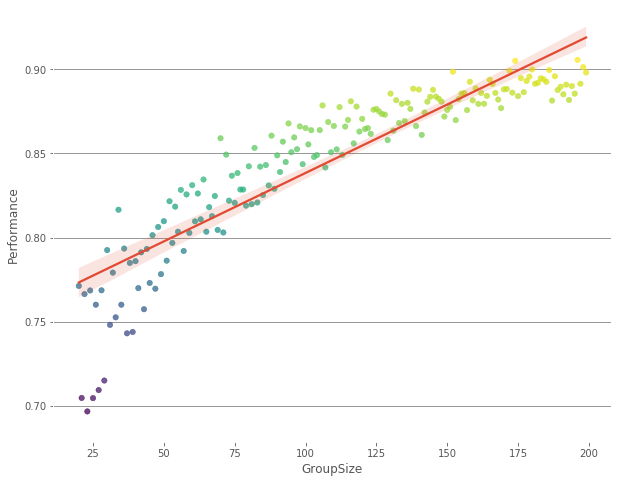

In [56]:
plot_sizes(np.arange(20, 200), accuracies, title = "")
ax = plt.gcf().gca()
ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")
savefig("DiverseGroup2_Performance_Size.jpg")

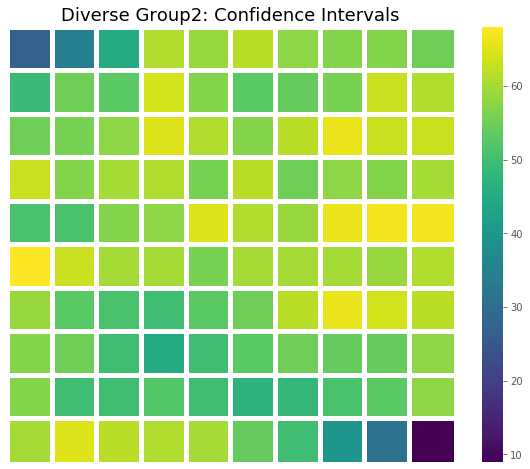

In [57]:
# Group Specializations 
confidence_grids(diversegroup(100, 70 ,75, 52, 58), title = "Diverse Group2: Confidence Intervals")
savefig("DiverseGroup2_Group_Specializations.jpg")

In [58]:
# Saving to the DataFrame
dfconfidence["Diverse2"] = confidences(diversegroup(100, 70 ,75, 52, 58))

In [59]:
# Diverse Groups
avg = []
proficiency_list = []
for i in range(10):
    diverse_groups = diversegroup(100, 70 ,75, 52, 58)
    proficiency_list.append(confidences)
    acc_avg = predict(diverse_groups, 1000)
    avg.append(acc_avg)
avg = np.array(avg)

In [60]:
dfGroupIndividual.loc["Diverse1"] = np.array([round(avg.mean(), 2),round(proficiency.mean(),2)/100], dtype = float)

In [61]:
diverse_plot = pd.Series([round(avg.mean(),2),0.56], ["Group", "AverageIndividual"])

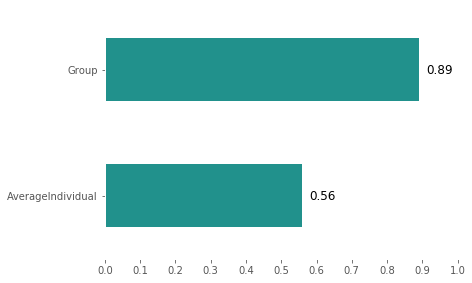

In [62]:
diverse_plot.plot(kind = "barh", color = mpl.cm.get_cmap("viridis")(2/4), figsize = (7, 5))

ax = plt.gcf().gca()
ax.invert_yaxis()

for i in ax.patches:
    text = str(round(i.get_width(), 2))
    plt.annotate(text,xy = [i.get_width(), i.get_y()+0.28], 
                xytext = [i.get_width()+0.02, i.get_y()+0.28], size = 12)
# Labelling
plt.title("", fontsize = 16)
plt.xticks(np.linspace(0, 1, 11))
#ax.xaxis.grid(color = "gray",)
ax.set_facecolor("white")
savebars("DiverseGroup1_Group_Individual.jpg")
plt.show()


**Key Findings**
* 1) The First Divere group - consisting of no experts but a wide varety of 

### Groups made up of only experts
In this a group of only experts is considered. In this case, the experts have overlapping knowledge about the given topic at hand. The model should be using this notion of experts

In [63]:
def experts(gs,minimum = 65, maximum = 80, diversityrate = 0.83):
    prof = int(round((minimum+maximum)/2))
    group = np.zeros(gs, dtype = np.int8)
    diverse_no = int(round(gs*diversityrate))
    group[-diverse_no:] = 1
    
    # General Expert
    general_mask = np.zeros(100)
    general_mask[:prof] = 1
    general_mask = general_mask.astype(bool)
    # Diverse 
    diverse_mask = diversegroup(diverse_no, expertmin=minimum,expertmax=maximum, ordinarymin=0,ordinarymax=0,expertprob = 100)

    # Mask
    mask_array = np.empty((len(group), 100))
    mask_array[group==0] = np.array(general_mask,dtype = bool)
    mask_array[group==1] = np.array(diverse_mask,dtype = bool)
    mask_array = mask_array.astype(bool)

    return mask_array

In [64]:
gs = 100
prof = 70
diversityrate = 0.85
group = np.zeros(gs, dtype = np.int8)
diverse_no = int(round(gs*diversityrate))
group[-diverse_no:] = 1
    
# General Expert
general_mask = np.zeros(100)
general_mask[:prof] = 1
general_mask = general_mask.astype(bool)
# Diverse 
exp_max = 80
exp_min = 65
diverse_mask = diversegroup(diverse_no, expertmin=exp_min,expertmax=exp_max, ordinarymin=0,ordinarymax=0,expertprob = 100)

# Mask
mask_array = np.empty((len(group), 100))
mask_array[group==0] = np.array(general_mask,dtype = bool)
mask_array[group==1] = np.array(diverse_mask,dtype = bool)
mask_array = mask_array.astype(bool)

In [65]:
# Creating a group of only experts
group_size = 100
expert_prof = 70

In [66]:
# Experts only group
experts_array = experts(group_size, expert_prof)
#experts_array = mask_array.copy()
groups = (experts_array.sum(axis = 1) >=65).astype(np.int32)
elements, counts = np.unique(groups, return_counts = True)

In [67]:
experts_array.sum(axis = 1)

array([75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75,
       79, 81, 75, 76, 79, 74, 71, 78, 78, 76, 81, 74, 78, 70, 81, 76, 73,
       75, 80, 78, 79, 73, 75, 74, 76, 76, 72, 79, 77, 77, 75, 77, 81, 71,
       72, 82, 70, 71, 77, 77, 72, 78, 71, 75, 77, 74, 74, 85, 70, 71, 73,
       77, 78, 71, 85, 76, 74, 80, 77, 75, 73, 72, 78, 76, 79, 72, 71, 70,
       78, 79, 78, 79, 77, 74, 70, 71, 76, 79, 74, 71, 79, 71, 76])

Total number of tiles is 100


<Figure size 2880x1440 with 0 Axes>

<Figure size 432x288 with 0 Axes>

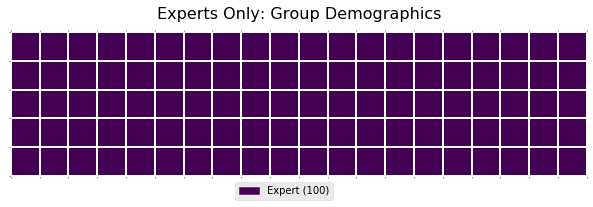

In [68]:
# Waffle Chart
plt.figure(figsize = (40, 20))
create_waffle_chart(["Expert"], pd.Series(counts), colormap = "viridis", height = 5, 
                   width = 20)
#set_grid()
plt.title("Experts Only: Group Demographics", fontsize = 16)
plt.xticks([])
plt.yticks([])
savewaffle("")
plt.show()

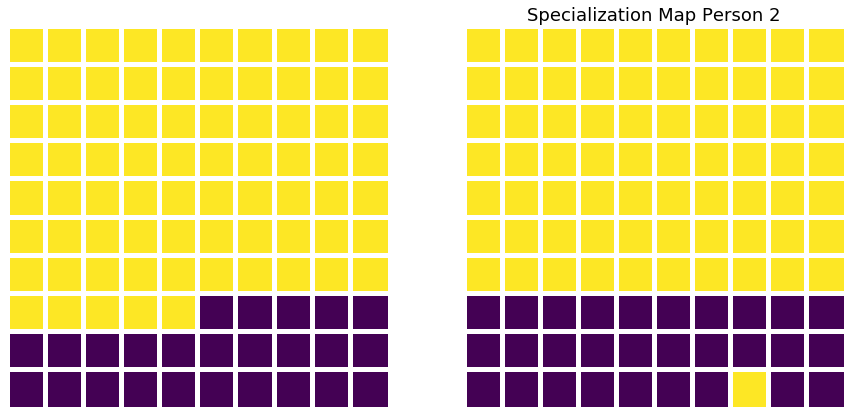

In [69]:
# Sample Heat map of a person in the group
plt.figure(figsize = (15, 7))
samples = [experts_array[0], experts_array[-2]]
for ind, sample in enumerate(samples):
    ax = plt.subplot(1, 2, ind+1)
    seaborn.heatmap(sample.reshape(10, 10), ax = ax, cmap = "viridis", cbar = False)
    for number in range(10):
        plt.axhline(number, color = "white", linewidth = 5)
        plt.axvline(number, color = "white", linewidth = 5)
    plt.xticks([])
    plt.yticks([])
# Title 
ax.set_title("Specialization Map Person "+str(ind+1), fontsize = 18)
savefig("ExpertsOnly_IndividualSpecializations.jpg")

* 1) It can be seen that a the experts share the same specializations. This is because they are called experts when they are good at a particular set of skills. 
* 2) The simulation has been built so as to perform this function. 

In [70]:
# Performance of the group 
average_performance = experts_array.mean()
group_performance = predict(experts_array,1000)
values = np.array([average_performance, group_performance], dtype = np.float32)
ind_group_per = pd.Series(values, ["AverageIndividual", "GroupPerformance"])

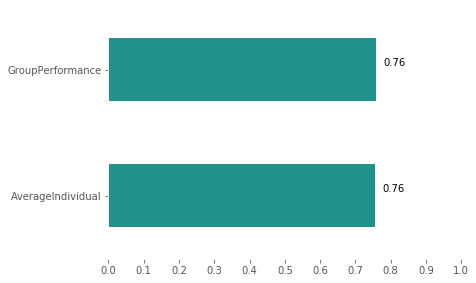

In [71]:
# Bar Graph 
ax = ind_group_per.plot(kind = "barh", color = mpl.cm.get_cmap("viridis")(2/4), figsize = (7, 5))
dfGroupIndividual.loc["Experts"] = values[-1::-1]
for i in ax.patches:
    text = str(round(i.get_width(), 2))
    plt.annotate(text,xy = [i.get_width(), i.get_y()+0.28], 
                xytext = [i.get_width()+0.02, i.get_y()+0.28], size = 10)
plt.xticks(np.linspace(0, 1, 11))
#ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")
savebars("ExpertsOnly_Group_Individual")
plt.show()

In [72]:
group_specializations = np.array(experts_array.sum(axis = 0))
experts_array.sum(axis = 0)

array([ 68,  70,  70,  70,  68,  67,  65,  67,  67,  64,  64,  66,  67,
        68,  65,  67,  63,  64,  64,  64,  63,  65,  70,  81,  83,  82,
        83,  82,  84,  92,  98,  99,  99,  99,  99, 100, 100,  98,  99,
        98,  97,  98,  99,  96,  97,  96,  98,  98,  98,  99,  99,  97,
        99, 100,  99,  99,  97,  98,  97,  98,  98,  98,  98,  98,  98,
       100, 100,  99,  98,  97,  96,  88,  88,  85,  79,  58,  54,  48,
        43,  41,  41,  42,  42,  41,  41,  41,  44,  42,  44,  43,  41,
        40,  39,  40,  42,  40,  43,  46,  43,  35])

In [73]:
# Saving to the DataFrame 
dfconfidence["Experts"] = experts_array.sum(axis = 0)

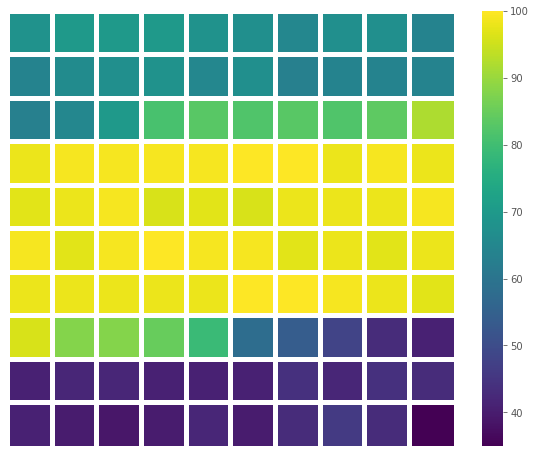

In [74]:
# Seaborn for Group Specializations
plt.figure(figsize=(10, 8))
seaborn.heatmap(group_specializations.reshape(10, 10), cmap = "viridis")
for i in range(10):
    plt.axhline(i, color="white", linewidth= 5)
    plt.axvline(i, color = "white", linewidth = 5)
#plt.title("Cumulative Specializations Group Specializations", fontsize= 18)
plt.xticks([])
plt.yticks([])
plt.grid(False)
savefig("ExpertsOnly_GroupSpecialization.jpg")

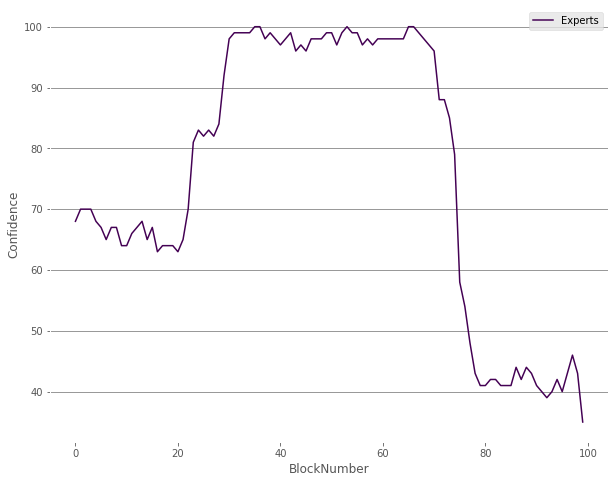

In [75]:
# Specialization Visualization 
group_specializations = pd.Series(experts_array.sum(axis = 0))
plt.figure(figsize = (10, 8))
ax = group_specializations.plot(kind = "line", cmap = "viridis", label = "Experts")
plt.legend()

# Title 
plt.title("", fontsize = 18)
plt.ylabel("Confidence")
plt.xlabel("BlockNumber")

ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")

savefig("ConfidenceAtBlocks.jpg")
plt.show()

**Key findings**
1) It is clear from the specialization heat maps that the there are a lot of overlapping blocks. This means that the knowledge is overlapping. 
2) The confidence is almost a 100 percent for some blocks where as it is very low for other blocks. 
3) There is a concentration of knowledge. What is already known is being emphasized while what is not known is not cared about. 

In [76]:
# Performance at different sizes
accuracies = []
for groupsize in range(20, 200):
    accuracy = []
    groups = []
    for runs in range(15):
        group = experts(groupsize, diversityrate = 0.82)
        groups.append(group)
    for predictor in groups:
        accuracy.append(predict(predictor, 1000))       
    acc = np.array(accuracy).mean()
    accuracies.append(acc)

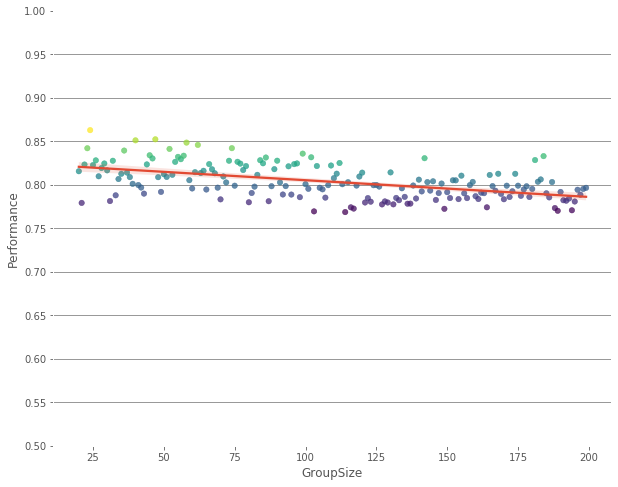

In [77]:
plot_sizes(np.arange(20, 200), accuracies, title = "Expert Group: Performance at different Group Sizes")
plt.title("")
plt.yticks(np.linspace(0.5, 1, 11), )
ax=plt.gcf().gca()
ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")
savefig("ExpertsOnly_Performance_Sizes.jpg")
plt.show()

In [78]:
# Adding Performance 
dfPerformance.loc["ExpertGroup"] = LinearFit(np.arange(20, 200), accuracies)

**KeyFindings**
* 1) Interesting - The performance of the group actually decreses as the group size increases. It might also be interesting to observe some of the confidence intervals of these groups. 
* 2) Though infact, the average individual performance is higher than 0.70, the entire group's performance is lower than

## Comparision of different Architectures

In [79]:
# Confidence Intervals
dfconfidence.head()

,Experts,Ordinary,Diverse1,Diverse2
0,68,28,27,25
1,70,37,37,34
2,70,43,45,38
3,70,53,45,45
4,68,62,54,47


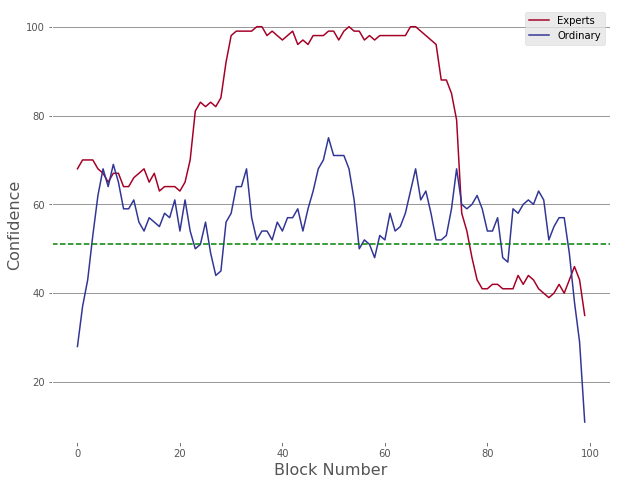

In [80]:
# Line plots of the intervals 
ax = dfconfidence[["Experts", "Ordinary"]].plot(kind  ="line", figsize = (10, 8), 
                                                      cmap = "RdYlBu")
# Labelling 
plt.title("", fontsize = 18)
plt.xlabel("Block Number", fontsize = 16)
plt.ylabel("Confidence", fontsize = 16)

# Cutoff 
plt.axhline(51, linestyle = "--", color = "green")
ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")
savefig("Different_Groups_ConfidenceAtVariousBlocks.jpg")

* 1) We can observe from the figure that the confidence at certain blocks for the experts is very high and almost is at a 100%. The confidence is concentrated in the case of experts. 
* 2) The confidence for experts after around block 65 is very low. Infact, the confidence shown in the figure lies below the cut-off line shown in the figure. 
* 3) A more clear visualization through the heatmaps can reveal more about the dynamics of the groups. 

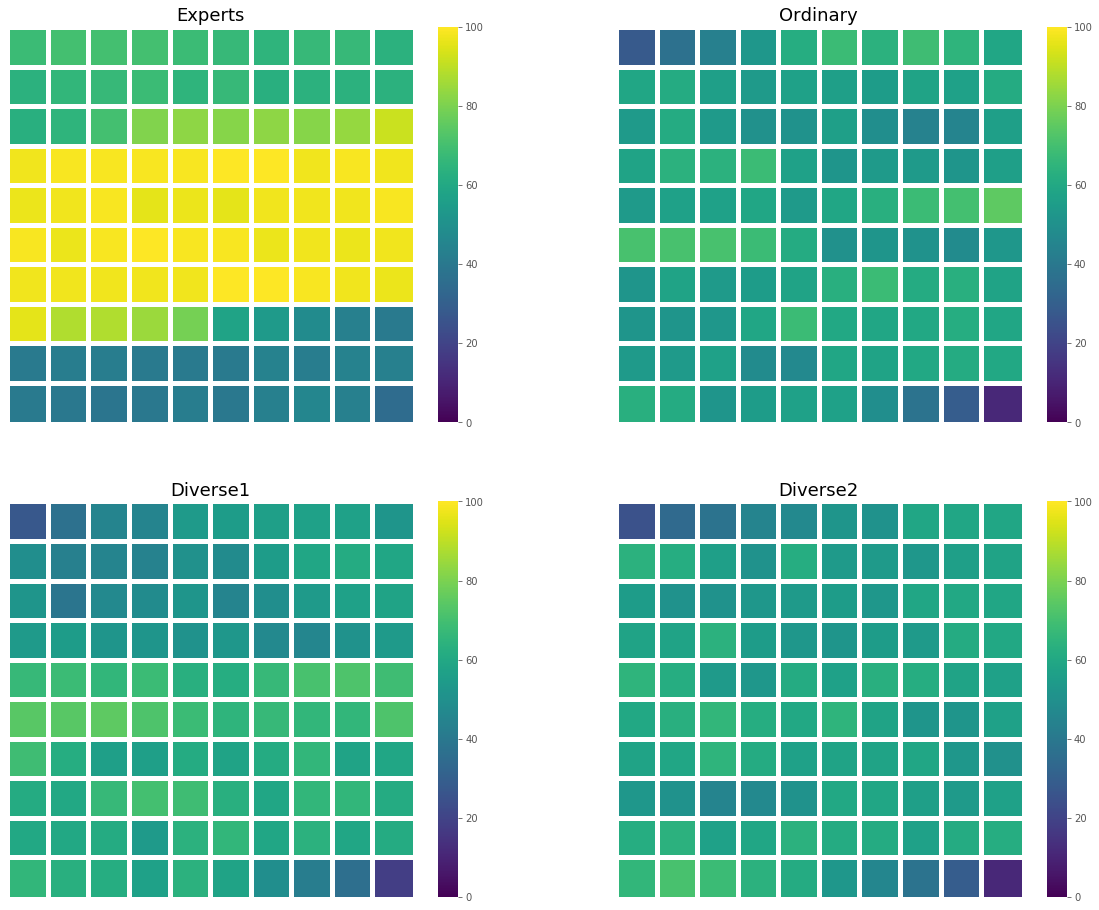

In [81]:
# Group Specialization Heatmaps of different groups
plt.figure(figsize = (20, 16))
for ind, column in enumerate(dfconfidence):
    ax = plt.subplot(2, 2, ind+1)
    confidence_array = dfconfidence[column].to_numpy()
    if (ind+1)%2 == 1:
        seaborn.heatmap(confidence_array.reshape(10, 10), cmap = "viridis", ax = ax, vmin = 0,vmax =100, 
                   robust = True, fmt = "f", 
                cbar = True)
    else: 
        seaborn.heatmap(confidence_array.reshape(10, 10), cmap = "viridis", ax = ax, vmin = 0,vmax =100, 
                   robust = True, fmt = "f")
    
    for i in range(10):
        plt.axhline(i, color="white", linewidth= 5)
        plt.axvline(i, color = "white", linewidth = 5)
    plt.title(column, fontsize= 18)
    plt.xticks([])
    plt.yticks([])
savefig("DifferentGroups_GroupSpecializations.jpg")

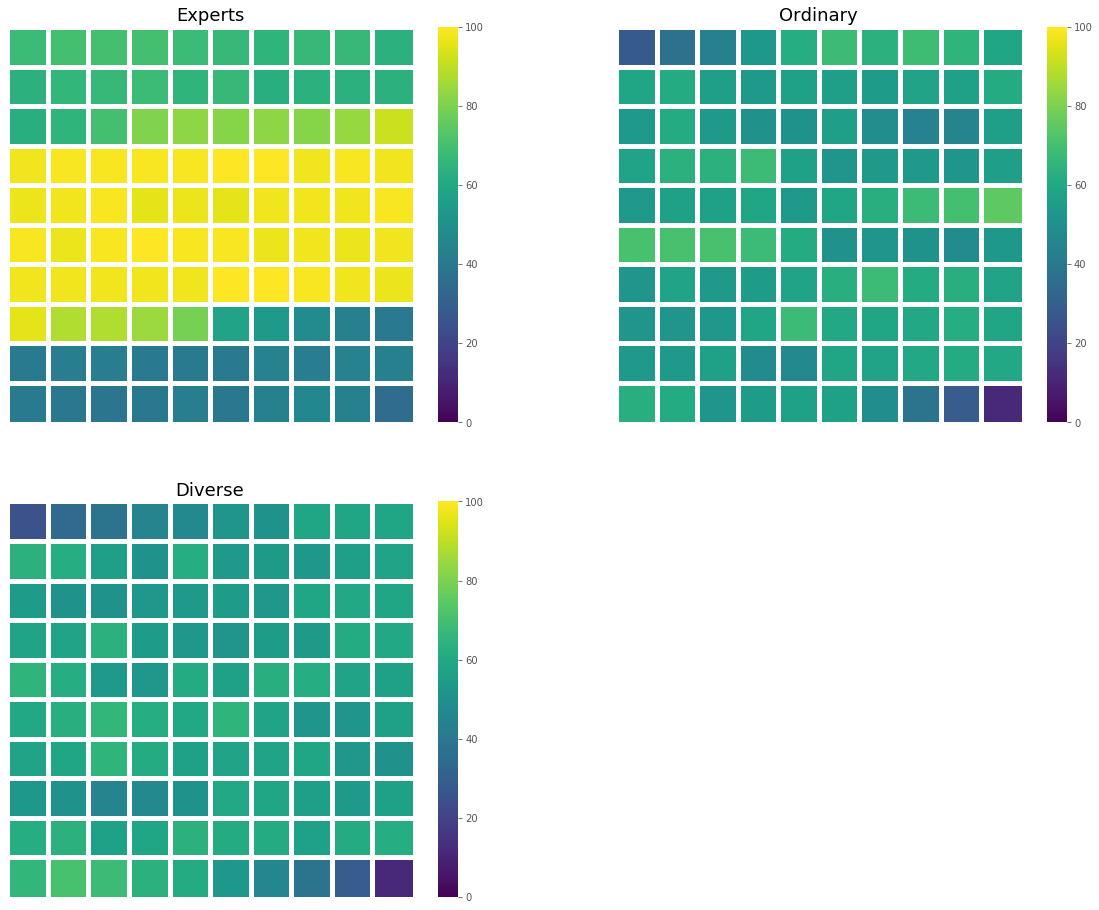

In [82]:
# Picture for the document
dfconfidence1= dfconfidence.rename(columns = {"Diverse2":"Diverse"})
dfconfidence1 = dfconfidence1[["Experts", "Ordinary", "Diverse"]]
plt.figure(figsize = (20, 16))
for ind, column in enumerate(dfconfidence1):
    ax = plt.subplot(2, 2, ind+1)
    confidence_array = dfconfidence1[column].to_numpy()
    if (ind+1)%2 == 1:
        seaborn.heatmap(confidence_array.reshape(10, 10), cmap = "viridis", ax = ax, vmin = 0,vmax =100, 
                   robust = True, fmt = "f", 
                cbar = True)
    else: 
        seaborn.heatmap(confidence_array.reshape(10, 10), cmap = "viridis", ax = ax, vmin = 0,vmax =100, 
                   robust = True, fmt = "f")
    
    for i in range(10):
        plt.axhline(i, color="white", linewidth= 5)
        plt.axvline(i, color = "white", linewidth = 5)
    plt.title(column, fontsize= 18)
    plt.xticks([])
    plt.yticks([])
savefig("DifferentGroups_GroupSpecializations.jpg")

* 1) The data in the line plot is summarized here. It can be clearly seen that the Diverse and Ordinary groups do cover most of the blocks in hundred. 
* 2) Only the expert group has dark red in its blocks. This shos it has high confidence in its response in a few blocks. But it does not have high confience in all the blocks. 
* 3) This is the drawback of the experts group

### Performance Comparision

In [83]:
# Building the linear data
xcoords = np.arange(5, 200)
scatters = []
for i in range(len(dfPerformance)):
    ycoords = dfPerformance.iloc[i, 0]*xcoords + dfPerformance.iloc[i, 1]
    scatters.append(scatters)

In [84]:
# Plotting the Line plots
#for data in scatters:
    #plt.plot(xcoords, data)

In [85]:
y_coords = []
for i in range(len(dfPerformance)):
    temp = dfPerformance.iloc[i, 0]*xcoords
    temp = temp+dfPerformance.iloc[i, 1]
    y_coords.append(temp)

In [86]:
# Performance
LineFits = pd.DataFrame(columns = ["Ordinary", "DiverseGroup1", "DiverseGroup", "Experts"])
LineFits["Ordinary"] = y_coords[0]
LineFits["DiverseGroup1"] = y_coords[1]
LineFits["DiverseGroup"] = y_coords[3]
LineFits["Experts"] = y_coords[2]
LineFits["XCoords"] = np.arange(5, 200)
LineFits = LineFits.set_index("XCoords")

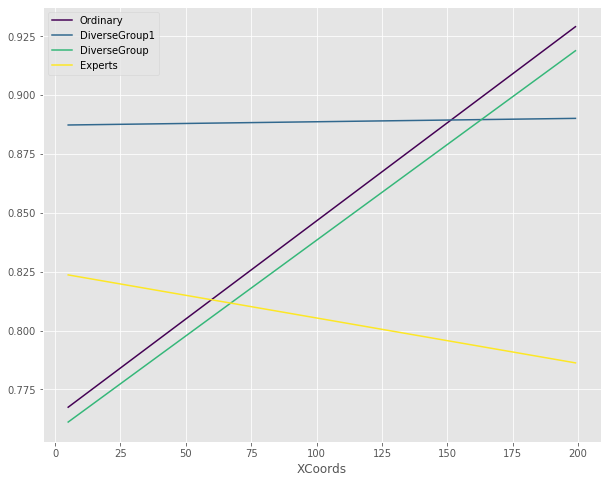

In [87]:
LineFits.plot(kind = "line", cmap = "viridis",
              figsize = (10, 8), 
             )

## Additional Ideas 
* 1) A bar plot to compare the performance of different architectures for one constant group size
* 2) Waffle Chart for a diverse group (for the introduction) 

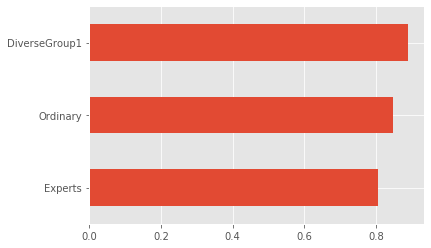

In [88]:
ax = LineFits.loc[100, ["Experts", "Ordinary", "DiverseGroup1"]].plot(kind= "barh")

In [110]:
# Waffle Chart for a small group
intro = diversegroup(50, 68, 72,51, 59)
intro_proficiencies = intro.sum(axis = 1)

In [111]:
intro_proficiencies

array([56, 58, 57, 52, 55, 51, 54, 52, 51, 51, 54, 58, 54, 56, 55, 58, 58,
       58, 53, 58, 56, 63, 56, 57, 59, 51, 53, 51, 52, 54, 51, 58, 51, 51,
       58, 57, 53, 56, 57, 53, 52, 57, 52, 52, 58, 56, 53, 57, 70, 68])

In [112]:
# masks = intro_proficiencies
low = (intro_proficiencies<54)
medium = ((intro_proficiencies>=54)&(intro_proficiencies<=60))
high = (intro_proficiencies>60)

In [113]:
# Copy
intro_copy = intro_proficiencies.copy()
intro_copy[low], intro_copy[medium], intro_copy[high] = 0, 1, 2
intro_copy = np.array(intro_copy, dtype = np.int8)

In [114]:
# counts 
elements, counts = np.unique(intro_copy, return_counts = True)

Total number of tiles is 50


<Figure size 432x288 with 0 Axes>

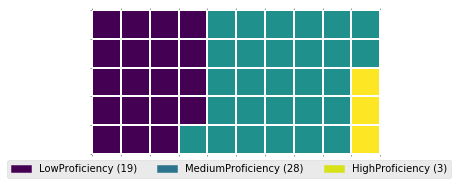

In [115]:
create_waffle_chart(["LowProficiency", "MediumProficiency", "HighProficiency"], pd.Series(counts), 5,10, "viridis")
ax = plt.gcf().gca()
ax.set_position([0.2,0.1, 0.5,0.8])
plt.savefig(path+"/"+"Simulation3.jpg")

In [116]:
# Accuracy 
runs = 10000
boxes_ = np.random.randint(0, 100, runs)
allps_ = []
for predictor_ in intro:
    maskpreds_ = predictor_[boxes_].astype(np.int8)
    allps_.append(maskpreds_)
allps_ = np.array(allps_)
accuracy_ = (allps_.mean(axis =0)>=0.50).mean()

In [117]:
intro_proficiencies.mean()

55.42

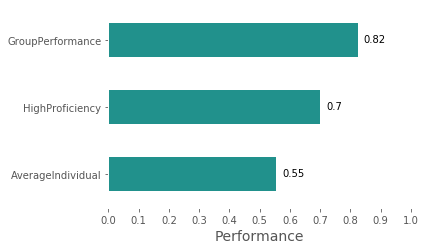

In [118]:
# Performance 
info = pd.Series([accuracy_,0.70,intro_proficiencies.mean()/100,  ], 
                 ["GroupPerformance","HighProficiency", "AverageIndividual" ]
                )
ax = info.plot(kind = "barh", color = mpl.cm.get_cmap("viridis")(2/4))
ax.invert_yaxis()
for i in ax.patches:
    text = str(round(i.get_width(), 2))
    plt.annotate(text,xy = [i.get_width(), i.get_y()+0.28], 
                xytext = [i.get_width()+0.02, i.get_y()+0.28], size = 10)
plt.xticks(np.linspace(0, 1, 11))
plt.xlabel("Performance", fontsize = 14)
ax = plt.gcf().gca()
ax.set_position([0.25,0.15, 0.7, 0.7])

ax.set_facecolor("white")
plt.savefig(path+"/"+"DiverseGroup.jpg")

In [98]:
path

'./SimulationPictures2/Set2'

In [99]:
dfPerformance

,Slope,Intercept
Model,,
OrdinaryGroup,0.000833052,0.763309
DiverseGroup,1.45041e-05,0.887262
ExpertGroup,-0.000192573,0.824625
DiverseGroup2,0.000812871,0.757113


In [100]:
group = diversegroup(100)

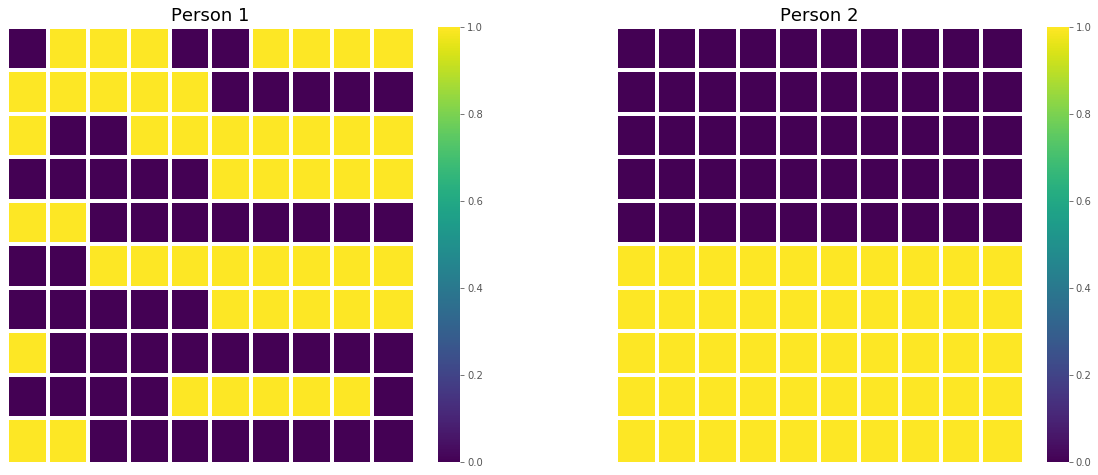

In [101]:
# Diverse people specializations
sample = group[[43,15]]
plt.figure(figsize= (20, 8))
for index, i in enumerate(sample):
    ax = plt.subplot(1, 2, index+1)
    seaborn.heatmap(i.reshape(10,10),ax = ax, cmap = "viridis")
    for grids in range(10):
        plt.axhline(grids, linewidth = 4, color = "white")
        plt.axvline(grids, linewidth = 4, color = "white")
        
        # Ticks
        plt.xticks([])
        plt.yticks([])
        # Title 
        plt.title("Person "+str(index+1), fontsize = 18)
savefig("DiverseGroupIndividualSpecializations.jpg")

In [102]:
sample

array([[False,  True,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False,  True, False, False,  True,  True,  True,  True,
         True,  True,  True, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True, False, False, False,
        False, False,  True,  True,  True,  True,  True,  True, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False,  True,  True,  True,  True,  True, False,
         True,  True, False, False, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, Fals

## Comparing different Groups

In [103]:
# Different groups
ind_group_per

AverageIndividual    0.7555
GroupPerformance     0.7590
dtype: float32

In [104]:
dfGroupIndividual

,GroupPerformance,IndividualPerformance
Architecture,,
Ordinary,0.8547,0.5621
Diverse1,0.89,0.59
Diverse2,0.81,0.5356
Experts,0.759,0.7555


In [105]:
plot_df = dfGroupIndividual.T[["Ordinary", "Diverse1", "Experts"]].rename(columns = {"Diverse1":"Diverse"})
                          

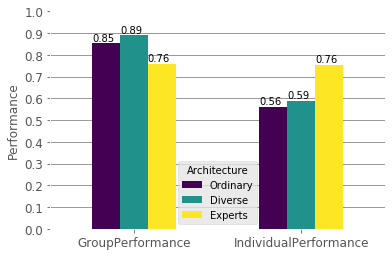

In [123]:
plot_df.plot(kind = "bar", cmap = "viridis",
            figsize = (6, 4), fontsize = 12)

for i in ax.patches:
    text = str(round(i.get_height(), 2))
    plt.annotate(text,xy = [i.get_x(),i.get_height()], 
                xytext = [i.get_x(),i.get_height()+0.01], size = 10)
plt.xticks(rotation = 360)
plt.yticks(np.linspace(0, 1, 11))
plt.ylabel("Performance")
ax = plt.gcf().gca()
ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")
savefig("IndividualGroupPerformance.jpg")


In [107]:
mpl.cm.get_cmap("viridis")(1/4)

(0.229739, 0.322361, 0.545706, 1.0)

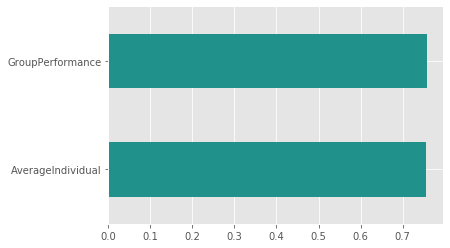

In [108]:
ind_group_per.plot(kind = "barh", color = mpl.cm.get_cmap("viridis")(2/4))

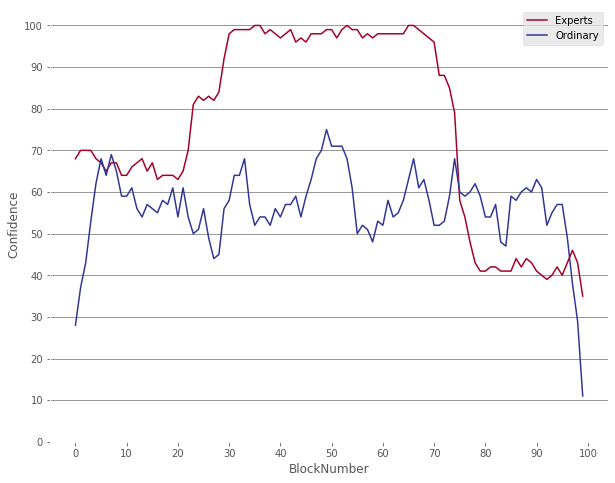

In [127]:
# NO specialization 
dfconfidence[["Experts", "Ordinary"]].plot(kind  ="line", figsize = (10, 8), 
                                                      cmap = "RdYlBu")
plt.xlabel("BlockNumber")
plt.ylabel("Confidence")

# Ticks
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 101, 10))
ax = plt.gcf().gca()
ax.yaxis.grid(color = "gray",)
ax.set_facecolor("white")
savefig("NewBackground.jpg")